In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML
import os

In [2]:
CollectASECount("")
#SEVERE_IMPACT=SYNONYMOUS_VARIANT;SEVERE_GENE=ENSG00000057252;SEVERE_GENE_NAME=SOAT1

In [470]:
GTEX_ASE = pd.read_csv("data/GTEX_ASE.Anno.2.tsv", delimiter="\t")

In [471]:
set(GTEX_ASE["SEVERE_IMPACT"].values)
LGDs = ['FRAMESHIFT_VARIANT', 'SPLICE_ACCEPTOR_VARIANT', 'SPLICE_DONOR_VARIANT', 'STOP_GAINED']

In [472]:
GTEX_ASE_LGD = GTEX_ASE[GTEX_ASE["SEVERE_IMPACT"].isin(LGDs)]
GENES_WITH_LGD = set(GTEX_ASE_LGD["SEVERE_GENE_NAME"].values)
GTEX_ASE_SYN = GTEX_ASE[(GTEX_ASE["SEVERE_IMPACT"]=="SYNONYMOUS_VARIANT") & 
                        (GTEX_ASE["SEVERE_GENE_NAME"].isin(GENES_WITH_LGD))]

In [473]:
GTEX_ASE_LGD.to_csv("NMD_model/GTEx.ASE.LGD.2.tsv", index=False, sep="\t")
GTEX_ASE_SYN.to_csv("NMD_model/GTEX_ASE.SYN.2.tsv", index=False, sep="\t")

In [474]:
Samples = pd.read_csv("../data/GTEx/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")

In [475]:
Samples.head(2)

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
print(sorted(list(set(Samples["SMTS"].values))))

['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood', 'Blood Vessel', 'Bone Marrow', 'Brain', 'Breast', 'Cervix Uteri', 'Colon', 'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina']


In [477]:
print(sorted(list(set(Samples["SMTSD"].values))))

['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala', 'Brain - Anterior cingulate cortex (BA24)', 'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere', 'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)', 'Brain - Hippocampus', 'Brain - Hypothalamus', 'Brain - Nucleus accumbens (basal ganglia)', 'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)', 'Brain - Substantia nigra', 'Breast - Mammary Tissue', 'Cells - EBV-transformed lymphocytes', 'Cells - Leukemia cell line (CML)', 'Cells - Transformed fibroblasts', 'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex', 'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Ske

In [478]:
for i, row in Samples.iterrows():
    SAMPID = row["SAMPID"]
    DONER = SAMPID.split("-")[1]
    SMTS = row["SMTS"]
    SMTSD = row["SMTSD"]

In [479]:
GTEX_ASE_LGD.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
123,GTEX-T6MN-0226-SM-5S2SO,snp_7_100552738,7_100552738_C_T,8,0,STOP_GAINED,ENSG00000169894,MUC3A
137,GTEX-T6MN-0226-SM-5S2SO,snp_8_52733231,8_52733231_G_A,0,0,STOP_GAINED,ENSG00000168300,PCMTD1
247,GTEX-S32W-0326-SM-5S2T4,snp_8_52733231,8_52733231_G_A,36,0,STOP_GAINED,ENSG00000168300,PCMTD1
340,GTEX-VUSG-2826-SM-5S2RZ,snp_8_52733231,8_52733231_G_A,4,0,STOP_GAINED,ENSG00000168300,PCMTD1
434,GTEX-S32W-0726-SM-5S2T3,snp_8_52733231,8_52733231_G_A,23,0,STOP_GAINED,ENSG00000168300,PCMTD1


In [480]:
GENES_WITH_LGD = list(GENES_WITH_LGD)
print(len(GENES_WITH_LGD))

1807


In [481]:
GTEX_ASE_SYN.head()

,SAMPLE,ID,INFO,NREF,NALT,SEVERE_IMPACT,SEVERE_GENE,SEVERE_GENE_NAME
21,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647177,12_53647177_T_G,12,0,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
22,GTEX-T6MN-0226-SM-5S2SO,snp_12_53647373,12_53647373_T_C,14,8,SYNONYMOUS_VARIANT,ENSG00000182544,MFSD5
35,GTEX-T6MN-0226-SM-5S2SO,snp_17_21318897,17_21318897_G_C,3,0,SYNONYMOUS_VARIANT,ENSG00000184185,KCNJ12
36,GTEX-T6MN-0226-SM-5S2SO,snp_17_21318918,17_21318918_G_A,3,0,SYNONYMOUS_VARIANT,ENSG00000184185,KCNJ12
37,GTEX-T6MN-0226-SM-5S2SO,snp_17_21318948,17_21318948_C_T,4,0,SYNONYMOUS_VARIANT,ENSG00000184185,KCNJ12


In [485]:
SYN_ADPS = TissueGeneMut(GTEX_ASE_SYN, Samples, "Adipose Tissue")

In [486]:
len(SYN_ADPS.keys())

1253

In [487]:
print(GTEX_ASE_SYN[GTEX_ASE_SYN["SEVERE_GENE"]=="ENSG00000234745"].shape)

(7006, 8)


In [488]:
Count = 0
ADPS_genes = []
for gene, Vars in SYN_ADPS.items():
    SYNs = set([])
    INDVs = set([])
    for var in Vars:
        SYNs.add(var.id)
        INDVs.add(var.sample)
    #print(len(SYNs), len(INDVs))
    if len(SYNs) >= 4 and len(INDVs) >= 10:
        Count += 1
        #print(gene, len(SYNs), len(INDVs))
        ADPS_genes.append([gene, len(SYNs), len(INDVs)])
print(Count)

411


In [489]:
# Compare to Andy
Andy_ADPSBQ = pd.read_csv("NMD_model/TissueASE/ADPSBQ.csv")
Andy_ADPSBQ_keep = Andy_ADPSBQ[(Andy_ADPSBQ["nvar"]>=4)&(Andy_ADPSBQ["nobs"]>=10)]
Andy_ADPSBQ_keep.shape

(3917, 7)

In [492]:
Andy_ADPSBQ_keep.head(2)

,gene,ahat,bhat,mu,sigma,nvar,nobs
2,ENSG00000000457,24.1,26.86,0.472920,0.069262,5,113
5,ENSG00000000971,0.2,0.83,0.194175,0.277632,7,167


In [493]:
Andy_ADPS_genes = []
for i, gene in enumerate([x for x,y,z in ADPS_genes]):
    row = Andy_ADPSBQ_keep[Andy_ADPSBQ_keep["gene"]==gene]
    if row.shape[0] == 0:
        continue
    #print(row["nvar"].values[0], row["nobs"].values[0])
    Andy_ADPS_genes.append([gene, row["nvar"].values[0], row["nobs"].values[0]])
    if ADPS_genes[i][1] == row["nvar"].values[0] and ADPS_genes[i][2] == row["nobs"].values[0]:
        print(ADPS_genes[i])

['ENSG00000167930', 4, 36]
['ENSG00000089159', 4, 17]
['ENSG00000116016', 4, 16]
['ENSG00000133030', 5, 17]
['ENSG00000135917', 4, 12]
['ENSG00000131473', 4, 31]


ValueError: x and y must be the same size

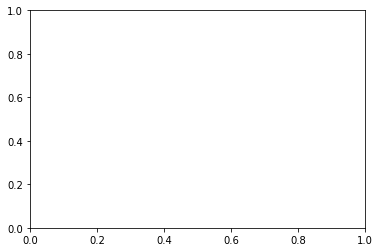

In [494]:
plt.scatter([y for x,y,z in ADPS_genes], [y for x,y,z in Andy_ADPS_genes])
plt.plot((0,60), (0,60), 'k-', alpha=0.75, zorder=0)
plt.show()
plt.scatter([z for x,y,z in ADPS_genes], [z for x,y,z in Andy_ADPS_genes])
plt.plot((0,120), (0,120), 'k-', alpha=0.75, zorder=0)
plt.show()

In [495]:
SYN_SKIN = TissueGeneMut(GTEX_ASE_SYN, Samples, "Skin")
Count = 0
SKIN_genes = []
for gene, Vars in SYN_SKIN.items():
    SYNs = set([])
    INDVs = set([])
    for var in Vars:
        SYNs.add(var.id)
        INDVs.add(var.sample)
    #print(len(SYNs), len(INDVs))
    if len(SYNs) >= 4 and len(INDVs) >= 10:
        Count += 1
        #print(gene, len(SYNs), len(INDVs))
        SKIN_genes.append([gene, len(SYNs), len(INDVs)])
print(Count)

419


In [105]:
Andy_SKIN = pd.read_csv("NMD_model/TissueASE/SKINS.csv")
Andy_SKIN_keep = Andy_SKIN[(Andy_SKIN["nvar"]>=4)&(Andy_SKIN["nobs"]>=10)]
Andy_SKIN_genes = []
for gene in [x for x,y,z in SKIN_genes]:
    row = Andy_SKIN_keep[Andy_SKIN_keep["gene"]==gene]
    #print(row["nvar"].values[0], row["nobs"].values[0])
    Andy_SKIN_genes.append([gene, row["nvar"].values[0], row["nobs"].values[0]])

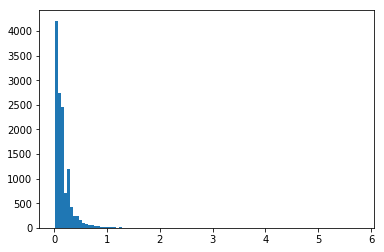

5.773502691896257


In [178]:
#Andy_SKIN["pseudoVar"] = 1/math.sqrt(Andy_SKIN["ahat"]+Andy_SKIN["bhat"])
pseudoVar = []
for i, row in Andy_SKIN.iterrows():
    a, b = row["ahat"], row["bhat"]
    pseudoVar.append(1/math.sqrt(a+b))
plt.hist(pseudoVar,bins=100)
plt.show()
print(max(pseudoVar))

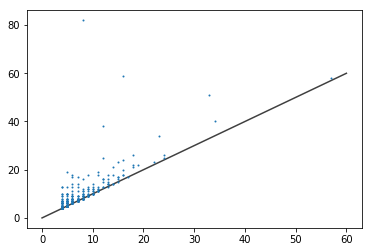

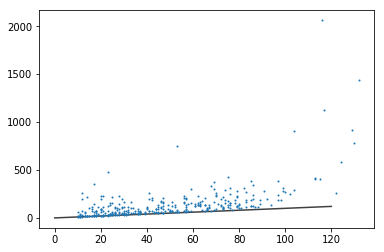

In [110]:
plt.scatter([y for x,y,z in SKIN_genes], [y for x,y,z in Andy_SKIN_genes], s=1)
plt.plot((0,60), (0,60), 'k-', alpha=0.75, zorder=0)
plt.show()
plt.scatter([z for x,y,z in SKIN_genes], [z for x,y,z in Andy_SKIN_genes], s=1)
plt.plot((0,120), (0,120), 'k-', alpha=0.75, zorder=0)
plt.show()

In [117]:
print(SYN_ADPS["ENSG00000167930"])

[<utils.ASEVar object at 0x1c224b79e8>, <utils.ASEVar object at 0x1c23d62940>, <utils.ASEVar object at 0x1c23d63f60>, <utils.ASEVar object at 0x1c23d6c7b8>, <utils.ASEVar object at 0x1c24222a90>, <utils.ASEVar object at 0x1c23d792e8>, <utils.ASEVar object at 0x1c23d94908>, <utils.ASEVar object at 0x1c241dec50>, <utils.ASEVar object at 0x1c24217048>, <utils.ASEVar object at 0x1c2412c2e8>, <utils.ASEVar object at 0x1c2412f748>, <utils.ASEVar object at 0x1c24156898>, <utils.ASEVar object at 0x1c23ca13c8>, <utils.ASEVar object at 0x1c23cce2e8>, <utils.ASEVar object at 0x1c248d7fd0>, <utils.ASEVar object at 0x1c249fcd30>, <utils.ASEVar object at 0x1c24936828>, <utils.ASEVar object at 0x1c22daf2e8>, <utils.ASEVar object at 0x1c22dd7a90>, <utils.ASEVar object at 0x1c24da5a58>, <utils.ASEVar object at 0x1c24dbc358>, <utils.ASEVar object at 0x1c24dd4a90>, <utils.ASEVar object at 0x1c22f729b0>, <utils.ASEVar object at 0x1c23145dd8>, <utils.ASEVar object at 0x1c232a5f60>, <utils.ASEVar object at 

In [748]:
a_b_q = SamplingAlphaBeta(step = 1)

In [749]:
len(a_b_q)

441

In [742]:
a_b_q

[[1490.4789935208642, 1490.4789935208642, -0.4519181116623506],
 [4051.541963787692, 4051.541963787692, -0.4517061074791782],
 [11013.232897403359, 11013.232897403359, -0.45162810418867166]]

In [692]:
genedat = SYN_ADPS["ENSG00000167930"]
#max_posteriori, _alpha, _beta = GridSearchASE(a_b_q, genedat)

In [695]:
df = pd.read_csv("/Users/jiayao/Work/BrainDisorders/src/NMD_model/ENSG00000167930.idx")

genedat = []
for i, row in df.iterrows():
    nref, nalt = row["Ref"], row["Alt"]
    genedat.append(ASEVar("","","",nref, nalt,""))

In [696]:
df.head(2)

,Variant,Carrier,Repl,Sample,Ref,Alt
0,snp_16_304514,GTEX-X62O,0,SRR1101643,45,24
1,snp_16_304514,GTEX-QDVJ,0,SRR613342,7,8


In [750]:
res = GridSearchASE(a_b_q, genedat)

 50 computed

/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


 140 computed

/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


 310 computed

/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


 440 computed

In [751]:
res

[[(2.061060050457031e-09, 4.5397868702434395e-05), -824.9721306195488],
 [(5.6025420825202305e-09, 0.00012340420154459704), -788.4740143782285],
 [(1.5229288336091837e-08, 0.00033544739861417574), -751.9791349068449],
 [(4.1397497744361734e-08, 0.0009118405680567719), -715.4930535155548],
 [(1.1253006586217281e-07, 0.002478639646600496), -679.0308850334878],
 [(3.058884331884439e-07, 0.006737641110652279), -642.6336982965711],
 [(8.314909694719557e-07, 0.018314807397764706), -606.4130014543506],
 [(2.2602267928434125e-06, 0.0497848081410711), -570.6709749185908],
 [(6.143933419182514e-06, 0.1353291393031935), -536.2225125338339],
 [(1.6700942568626075e-05, 0.3678627402288737), -505.24021601149695],
 [(4.5397868702434395e-05, 0.9999546021312976), -483.38342921868787],
 [(0.00012340420154459704, 2.7181584242575005), -484.7508293304676],
 [(0.00033544739861417574, 7.3887206515320365), -541.3085900292992],
 [(0.0009118405680567719, 20.08462508261961), -712.5954347055398],
 [(0.002478639646

In [752]:
loglikelihoods = [x[1] for x in res]

In [753]:
idx = np.argmax(loglikelihoods)
print(res[idx])

[(74.2065795512883, 74.2065795512883), -106.41612752163053]


In [754]:
print(np.average(alphas, weights=likelihoods))
print(np.average(betas, weights=likelihoods))

37.489644037332155
37.489644037332155


In [755]:
#a = 235.48; b = 273.18;
a = 83; b = 95;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-102.96669806381978


In [756]:
a = 235.48; b = 273.18;
#a = 83; b = 95;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-103.48895137944243


In [757]:
a = 20; b = 20;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-107.97827726982223


In [739]:
a = 27; b = 27;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post)

-107.06337551283255


In [689]:
#_alpha, _beta
a = 235.48; b = 273.18;
#a, b = 27.299075016572118, 27.299075016572118
mean = scipy.stats.beta.mean(a,b)
var = scipy.stats.beta.std(a,b)
print(a, b, mean, var)

235.48 273.18 0.4629418472063854 0.022086840861581813


In [720]:
af, bf = 6.508259020952768, 0.8807970779778822
k = 24; n = 69
#6.508259020952768 0.8807970779778822
#24 69 -11.334479385212042
print(beta_binom_ASE2(0.5, af, bf, k, n))
res = SimpsonQuad(beta_binom_ASE, 0, 1, args=(af, bf, k, n), steps=100)
J1 = math.log(Jacobian1(af, bf))
J2 = math.log(Jacobian2(af, bf))
prior = scipy.stats.halfcauchy.logpdf(1/math.sqrt(af+bf))
res2 = math.log(res) + J1 + J2 + prior
print(J1, J2, prior, math.log(res), res2)

(-2.17475008743004, -5.545270172148161)
-5.0 1.7461439779140548 -0.5785107163324273 -8.08062336312605 -11.912990101544422


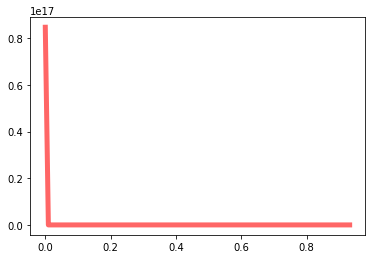

In [133]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 0.1,0.9
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')

In [186]:
# Test with 1 example
# parse idx file
Test_ASE_GENE = ASEGene("ENSG00000167930")

idx_fil = pd.read_csv("NMD_Model/ENSG00000167930.idx")
for i, row in idx_fil.iterrows():
    var = ASEVar(row["Sample"], row["Variant"], row["Ref"], row["Alt"], "ENSG00000167930")
    Test_ASE_GENE.ASEVars.append(var)

In [193]:
a = 235.48; b = 273.18;
#a = 83; b = 95;
post = ComputeLikelihood(genedat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))
print(post, scipy.stats.beta.mean(a,b), scipy.stats.beta.std(a,b))

-121.77439452826998 0.4629418472063854 0.022086840861581813


In [497]:
#
Andy_LGD = pd.read_csv("NMD_model/DEBUG_parmfit_table_ef.csv")
Andy_LGD.head(2)
ADPSBQ_LGD = Andy_LGD[Andy_LGD["tissue"]=="ADPSBQ"]
ADPSBQ_vars = set(ADPSBQ_LGD["variant"].values)

In [500]:
my_ADPS_LGD_vars = set(LGD_ADPS.keys())
ADPSBQ_vars.difference(my_ADPS_LGD_vars)

{'indel:1D_10_125780752',
 'indel:1D_10_27687759',
 'indel:1D_10_70156582',
 'indel:1D_10_88417866',
 'indel:1D_11_720552',
 'indel:1D_12_4735969',
 'indel:1D_12_66704273',
 'indel:1D_14_105173980',
 'indel:1D_14_51378590',
 'indel:1D_15_42160355',
 'indel:1D_17_17075180',
 'indel:1D_17_78078909',
 'indel:1D_19_3544726',
 'indel:1D_19_43979688',
 'indel:1D_19_48581032',
 'indel:1D_2_100210334',
 'indel:1D_2_242163075',
 'indel:1D_4_2074702',
 'indel:1D_5_60195521',
 'indel:1D_6_99958089',
 'indel:1D_7_107664504',
 'indel:1D_7_92146720',
 'indel:1D_8_121293166',
 'indel:1D_8_144940776',
 'indel:1D_8_22570907',
 'indel:1D_9_130162219',
 'indel:1D_9_139235481',
 'indel:1D_X_130409665',
 'indel:1I_10_118215310',
 'indel:1I_10_27687534',
 'indel:1I_12_122064788',
 'indel:1I_12_39720130',
 'indel:1I_12_4735965',
 'indel:1I_13_113719405',
 'indel:1I_14_23235885',
 'indel:1I_14_73976140',
 'indel:1I_16_19592990',
 'indel:1I_16_50763778',
 'indel:1I_16_89811434',
 'indel:1I_17_7751917',
 'indel

In [501]:
my_ADPS_LGD_vars.difference(ADPSBQ_vars)

{'indel:1D_10_102796865',
 'indel:1D_10_75184515',
 'indel:1D_10_7820915',
 'indel:1D_11_108032283',
 'indel:1D_11_58920050',
 'indel:1D_11_58979221',
 'indel:1D_11_77784146',
 'indel:1D_12_13061364',
 'indel:1D_12_31246253',
 'indel:1D_13_103443332',
 'indel:1D_13_50589928',
 'indel:1D_13_61985658',
 'indel:1D_14_24683266',
 'indel:1D_14_24909628',
 'indel:1D_14_62259561',
 'indel:1D_15_43653962',
 'indel:1D_15_91428521',
 'indel:1D_16_2059621',
 'indel:1D_16_67864358',
 'indel:1D_16_732287',
 'indel:1D_17_15406368',
 'indel:1D_17_27893565',
 'indel:1D_17_41108413',
 'indel:1D_17_45247388',
 'indel:1D_17_4689194',
 'indel:1D_17_7165395',
 'indel:1D_17_74383107',
 'indel:1D_17_78201715',
 'indel:1D_18_3452222',
 'indel:1D_19_33444647',
 'indel:1D_19_33444671',
 'indel:1D_19_58301766',
 'indel:1D_1_1289828',
 'indel:1D_1_171165802',
 'indel:1D_1_218504399',
 'indel:1D_1_27699670',
 'indel:1D_1_89729566',
 'indel:1D_20_13752092',
 'indel:1D_20_30156016',
 'indel:1D_20_30610544',
 'indel:

In [270]:
#Andy's NMD efficiency
AEBE = pd.read_csv("NMD_model/DEBUG_parm_eps_abhat_bytissue.csv")
AEBE

,tissue,a_hat,b_hat
0,ADPSBQ,1.73,0.98
1,ARTTBL,2.01,0.99
2,BRAINS,2.08,0.99
3,BRNACC,2.60,1.75
4,BRNAMY,3.23,1.12
5,BRNCDT,4.11,1.17
6,BRNCHA,2.09,0.95
7,BRNCHB,2.70,0.94
8,BRNCTXA,2.58,0.98
9,BRNCTXB,2.19,0.97


In [201]:
LGD_ADPS = TissueLGD(GTEX_ASE_LGD, Samples, "Adipose Tissue")

In [208]:
LGD_ADPS["indel:2D_1_6727802"].gene

'ENSG00000007923'

GTEX-SNOS-1426-SM-32PLY
ENSG00000010165
-2.197471227111831 0.32


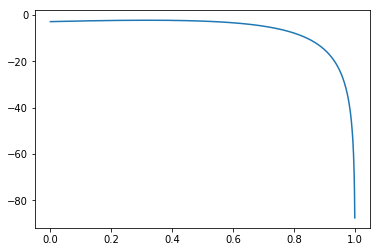

In [586]:
TestOneVar(LGD_ADPS["snp_1_171751126"], AEBE, Tissue="ADPSBQ")

In [258]:
#snp_8_144522387,GTEX-WFG8,ADPSBQ,0.0588984
var = "snp_8_144522387"
print(LGD_ADPS[var].sample)
print(LGD_ADPS[var].gene)

GTEX-WFG8-2326-SM-5S2UE
ENSG00000014164


GTEX-WFG8-2326-SM-5S2UE
ENSG00000014164
-0.01991667909039554 0.999


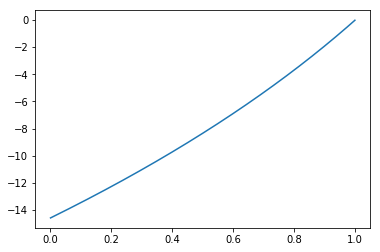

In [587]:
TestOneVar(LGD_ADPS["snp_8_144522387"], AEBE, Tissue="ADPSBQ")

GTEX-X261-0226-SM-3NMD2
ENSG00000054523
GTEX-X261-0226-SM-3NMD2
ENSG00000054523
-1.1874017031732558 0.659


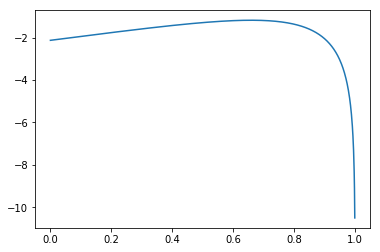

In [588]:
# indel:1I_1_10425476,GTEX-X261,ADPSBQ,0.62443
var = "indel:1I_1_10425476"
print(LGD_ADPS[var].sample)
print(LGD_ADPS[var].gene)
TestOneVar(LGD_ADPS[var], AEBE, Tissue="ADPSBQ")

In [591]:
aa = math.exp(-5/2)

In [593]:
math.pow(aa, -5/2)

518.012824668342

In [ ]:
np.average()

In [281]:
print(LGD_ADPS[var].nref, LGD_ADPS[var].nalt)
EA

6 2


In [287]:
#4
ae, be = 2, 1
af, bf = 10, 10
for nref, nalt in [(16, 44-16), (6,13-6), (14,34-14), (273, 639-273)]:
    var = ASEVar("1", "1", "1", nref, nalt, "GENE")
    maxP, e_hat, all_e, allPosts = EstimateE_hat(var, af, bf, ae, be, dx=0.01)
    print(maxP, e_hat)

-4.5485263316364275 0.26
-2.4249821548842703 0.42000000000000004
-3.776601126670508 0.31
-6.692921914669308 0.26


In [290]:
a, b = 10, 5
for x in np.arange(0.1, 1, 0.1):
    print(math.log(beta.pdf(x, a, b)), beta.pdf(x, a, b))

-11.933368027268449 6.56756100000001e-06
-6.166175544854475 0.0020992491520000016
-3.0511151423790874 0.04730614188299999
-1.0785792096220934 0.34007836262399954
0.20042652502997707 1.2219238281249998
0.9487463309187287 2.582470066175997
1.1853741595569307 3.2719108091669993
0.7652962607449769 2.149631131648
-0.9472451405873539 0.38780790948899974


In [295]:
a, b = 10, 5
for x in np.arange(0,13,1):
    print(math.log(binom.pmf(x, 12, 0.35)), binom.pmf(x, 12, 0.35))

-5.169394993109451 0.0056880090631057124
-3.303527551727676 0.03675328933083685
-2.2178186678954743 0.1088462799413245
-1.6328850719757604 0.1953651178434032
-1.4409940641656567 0.23669235431027658
-1.5900296433261438 0.20391956679039228
-2.0549181719051104 0.1281033175990924
-2.828108060138591 0.05912460812265811
-3.917150897790551 0.01989770465666376
-5.347120322413103 0.004761843849457997
-7.170132335145263 0.0007692209295278294
-9.493919635789911 7.530834275097634e-05
-12.597865493984134 3.3792205080566344e-06


In [585]:
af, bf = 20, 100
e = 0
k = 12; n = 48
ae, be = 2, 1
var = ASEVar("1", "1", "1", 48-12, 12, "GENE")
#res, err = quad(beta_binom_Ehat, 0, 1, args=(e, af, bf, k, n))
#print(res)
maxP, e_hat, all_e, allPosts = EstimateE_hat2(var, af, bf, ae, be, dx=0.1)

12 48
0.00 0.00 0.00000 -inf -inf
0.00 0.10 0.10000 -6.45699 0.37100
0.00 0.20 0.20000 -2.37941 1.88027
0.00 0.30 0.30000 -2.32096 -3.63550
0.00 0.40 0.40000 -4.41820 -13.43045
0.00 0.50 0.50000 -8.30405 -27.24056
0.00 0.60 0.60000 -14.14936 -45.86766
0.00 0.70 0.70000 -22.65611 -71.41932
0.00 0.80 0.80000 -35.65047 -109.02327
0.00 0.90 0.90000 -59.19037 -175.40697
12 48
0.10 0.00 0.00000 -inf -inf
0.10 0.10 0.09091 -7.23890 0.37100
0.10 0.20 0.18367 -2.67400 1.88027
0.10 0.30 0.27835 -2.12324 -3.63550
0.10 0.40 0.37500 -3.72307 -13.43045
0.10 0.50 0.47368 -7.10630 -27.24056
0.10 0.60 0.57447 -12.44367 -45.86766
0.10 0.70 0.67742 -20.43704 -71.41932
0.10 0.80 0.78261 -32.91248 -109.02327
0.10 0.90 0.89011 -55.92779 -175.40697
12 48
0.20 0.00 0.00000 -inf -inf
0.20 0.10 0.08163 -8.16498 0.37100
0.20 0.20 0.16667 -3.09768 1.88027
0.20 0.30 0.25532 -2.02866 -3.63550
0.20 0.40 0.34783 -3.09360 -13.43045
0.20 0.50 0.44444 -5.92447 -27.24056
0.20 0.60 0.54545 -10.69108 -45.86766
0.20 0.70 0.

In [559]:
for i, (e, P) in enumerate(zip(all_e, allPosts)):
    print(i, e, P, math.exp(P))

0 0.1 -30.45486078343931 5.937751453203997e-14
1 0.2 -32.95513258771452 4.872678603769675e-15
2 0.30000000000000004 -35.912027966574776 2.5328205440935585e-16
3 0.4 -39.48268739722387 7.126671368416443e-18
4 0.5 -43.9152394030055 8.469423620963016e-20
5 0.6 -49.63318696084398 2.783433075398311e-22
6 0.7000000000000001 -57.445478289733536 1.126537799471378e-25
7 0.8 -69.20219232895707 8.828150655200438e-31
8 0.9 -90.9116783422639 3.292757558848576e-40


In [445]:
for i, (e, P) in enumerate(zip(all_e, allPosts)):
    print(i, e, P, math.exp(P))

0 0.1 -4.918292527300896 0.007311604559668204
1 0.2 -5.3921368830616005 0.004552235340370688
2 0.30000000000000004 -5.978519431186667 0.002532573166640112
3 0.4 -6.71865387660443 0.001208163456918867
4 0.5 -7.678260731592783 0.00046277909628295467
5 0.6 -8.97061409037012 0.00012709012336634517
6 0.7000000000000001 -10.814187883445825 2.0112121128315003e-05
7 0.8 -13.713389053668518 1.1075180317514426e-06
8 0.9 -19.321206046752575 4.063561436450683e-09


In [556]:
f = lambda x: beta.pdf(x, 1, 2)
f2 = lambda x: binom.pmf(x, 10, 0.5)
def f(x, a, b):
    return beta.pdf(x,a,b)
res1 = SimpsonQuad(f, 0, 1, args=(10,20), steps=10)
res2, err = quad(f, 0, 1, args=(10, 20))
print(1-res, 1-res2)

-1.3988810110276972e-14 -6.661338147750939e-16


In [431]:
def SimpsonQuad(func, start, end, args, steps=100):
    step_size = (end - start ) / steps
    res = 0
    for step in range(steps):
        x = start + step_size/2
        _args = tuple([x] + [_ for _ in args])
        start += step_size
        h = func(*_args)
        res += step_size*h
    return res

def f(x, b, c):
    return x * x * x + b*x + c

In [432]:
SimpsonQuad(f, 0, 1, args=(1,2))

2.7499875000000005

In [433]:
quad(f, 0,1, args=(1,2))

(2.7500000000000004, 3.053113317719181e-14)

In [435]:
res, err = quad(beta_binom_Ehat, 0, 1, args=(e, af, bf, k, n))
res

0.03678928214271003

In [436]:
SimpsonQuad(beta_binom_Ehat, 0, 1, args=(e, af, bf, k, n))

0.03678928214229183

In [510]:
a, b = reparameter(-2, 3)
a,b

(2.3942546916271024, 17.691282231560564)

In [511]:
print(math.log(a/b), math.log(a+b))

-2.0 3.0


In [543]:
def f(x):
    return math.sin(math.cos(x))*math.tan(x)

In [544]:
x = SimpsonQuad(f, 0, math.pi, args=(), steps=10000)
#x = quad(f, )
x

1.892166147654902

In [623]:
def LoadLGDDat(fname):
    hand = open(fname, 'rt')
    l = next(hand)
    res = []
    for l in hand:
        llist = l.strip().split(",")
        res.append([int(x) for x in llist] )
    return res

In [795]:
#LGD_Dat = LoadLGDDat("./NMD_model/BRNAMY.obs")
LGD_Dat = LoadLGDDat("./NMD_model/test.2.obs")

In [796]:
a, b = 3.23, 1.12
post = ComputeLikelihoodNMDPara(LGD_Dat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))

12 54 -5.148998779581304
0 90 -2.320296124820904
6 52 -2.7353150778789055
9 78 -3.0995767157063057
5 34 -2.8376434653269764
7 33 -4.050059080434127
3 66 -2.164093109090438
4 33 -2.4190249131301766
5 28 -3.1616085496742854
-3.6754396127514815 1.2858108225415685 -0.20692071580732257


In [797]:
post

-30.533165321660658

In [ ]:
a, b = 3.23, 1.12
post = ComputeLikelihoodNMDPara(LGD_Dat, a, b, math.log(scipy.stats.halfcauchy.pdf(1/math.sqrt(a+b))))

In [794]:
post

-28.683237378551535

In [779]:
def func1(x,y):
    return math.exp(math.sin(x)+math.cos(y))
def func2(x,y):
    return math.sin(x+y)
def func3(x,y):
    return x/math.log(x+y)

In [780]:
res, err = dblquad(func1, 0,1,lambda x:0, lambda x:1)
res

3.8211448200278406

In [777]:
res, err = dblquad(func2, 0,10,lambda x:0, lambda x:10)
res

-2.0009874725063637

In [778]:
res, err = dblquad(func3, 1,3,lambda x:1, lambda x:3)
res

5.820621354724327